In [1]:
import sys
sys.path.append('../src/')
sys.path.append('../gtm/')

import importlib
%matplotlib inline
import matplotlib.pyplot as plt

from sim_utils import *
from data import *
from simulation import *

[nltk_data] Downloading package stopwords to /Users/shim-
[nltk_data]     kojio/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/Users/shim-kojio/Desktop/internship/codes/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# importlib.reload(sim_utils)
# from sim_utils import *

### simulate num_simulations times

In [2]:
num_topics = 20
num_simulations = 100
doc_args = {"min_words": 50,"max_words": 100,"num_docs": 5000,"voc_size": 1000}


s = Simulator(model_type="lda",num_topics=num_topics,num_silulations=num_simulations)
s.generate_docs(is_output=True,doc_args=doc_args)
s.estimate_distributions(is_output=True)

100%|██████████| 100/100 [22:22<00:00, 13.43s/it]


### matching the topic between two matrices (true and estimated) by Hungarian algorithm
1. the column of doc-topic matrix (by cossim, correlation, or dot_product)
2. the row of topic-word matrix (by top10 keyword)

#### by cosine similarity

In [4]:
cs_corres_num_topic_dict = matching_topic(
    model_type="lda", score_method="cossim", num_simulations=num_simulations
)

#### by correlation coefficient

In [5]:
cc_corres_num_topic_dict = matching_topic(
    model_type="lda", score_method="correlation", num_simulations=num_simulations
)

### drawing the topic model performance
- by cosine similarity
- by correlation coefficient
- by top10 keywords

#### by cosine similarity

In [6]:
df_cossim = calculate_score(
    model_type="lda",
    score_type="cossim",
    num_simulations=num_simulations,
    corres_num_topic_dict=cs_corres_num_topic_dict)

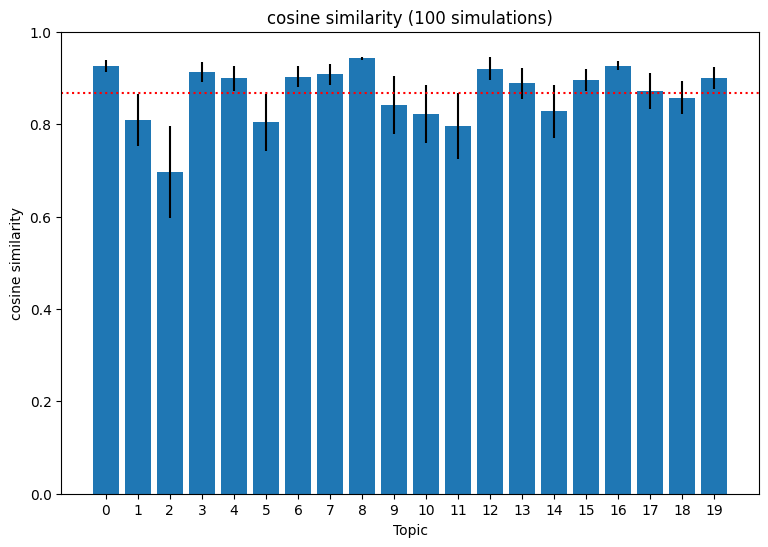

In [7]:
fig, ax = plt.subplots(figsize=(9, 6))
x = np.arange(num_topics)
cossim_mean = df_cossim.mean()
cossim_var = df_cossim.var()
ax.bar(x, cossim_mean, yerr=cossim_var)
ax.axhline(cossim_mean.mean(), color='r', linestyle='dotted')
ax.set_ylim(0, 1)
ax.set_xlabel("Topic")
ax.set_xticks(range(num_topics))
ax.set_ylabel("cosine similarity")
ax.set_title("cosine similarity ({} simulations)".format(num_simulations))
plt.savefig("../../lda_cossim.png")
plt.show()

#### by correlation coefficient

In [8]:
df_corr = calculate_score(
    model_type="lda",
    score_type="correlation",
    num_simulations=num_simulations,
    corres_num_topic_dict=cs_corres_num_topic_dict)

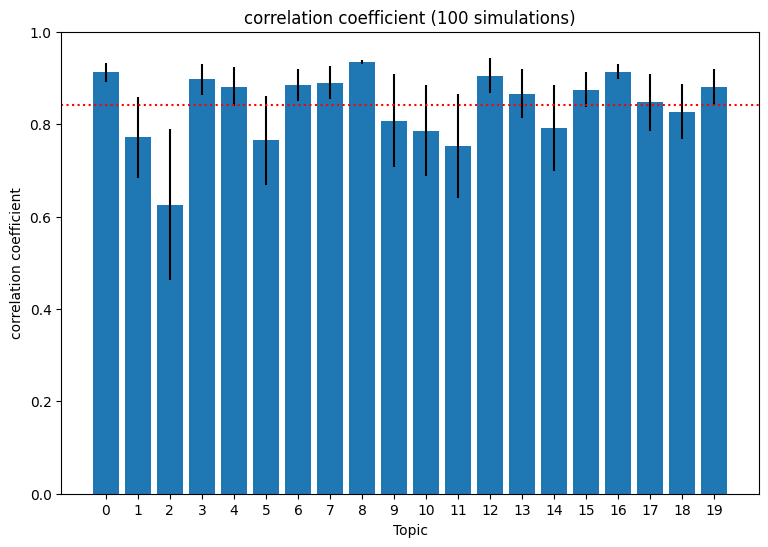

In [9]:
fig, ax = plt.subplots(figsize=(9, 6))
x = np.arange(num_topics)
correlation_mean = df_corr.mean()
correlation_var = df_corr.var()
ax.bar(x, correlation_mean, yerr=correlation_var)
ax.axhline(correlation_mean.mean(), color='r', linestyle='dotted')
ax.set_ylim(0, 1)
ax.set_xlabel("Topic")
ax.set_xticks(range(num_topics))
ax.set_ylabel("correlation coefficient")
ax.set_title("correlation coefficient ({} simulations)".format(num_simulations))
plt.savefig("../../lda_correlation.png")
plt.show()

#### keywords

In [10]:
df_keywords = calculate_score(
    model_type="lda",
    score_type="keywords",
    num_simulations=num_simulations,
    corres_num_topic_dict=cs_corres_num_topic_dict)

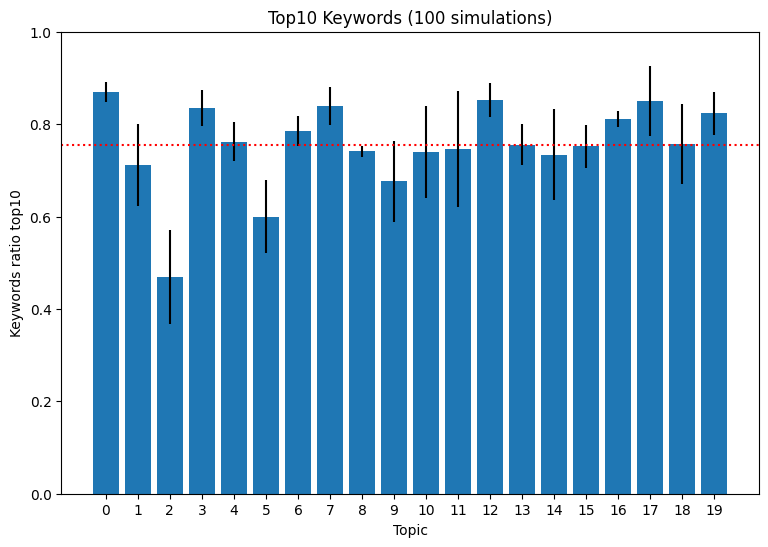

In [11]:
fig, ax = plt.subplots(figsize=(9, 6))
x = np.arange(num_topics)
key_mean = df_keywords.mean()
key_var = df_keywords.var()
ax.bar(x, key_mean, yerr=key_var)
ax.axhline(key_mean.mean(), color='r', linestyle='dotted')
ax.set_ylim(0, 1.0)
ax.set_xlabel("Topic")
ax.set_xticks(range(num_topics))
ax.set_ylabel("Keywords ratio top10")
ax.set_title("Top10 Keywords ({} simulations)".format(num_simulations))
plt.savefig("../../lda_10keyword.png")
plt.show()

#### Euclid distance

In [12]:
df_euclid = calculate_score(
    model_type="lda",
    score_type="euclid",
    num_simulations=num_simulations,
    corres_num_topic_dict=cs_corres_num_topic_dict)

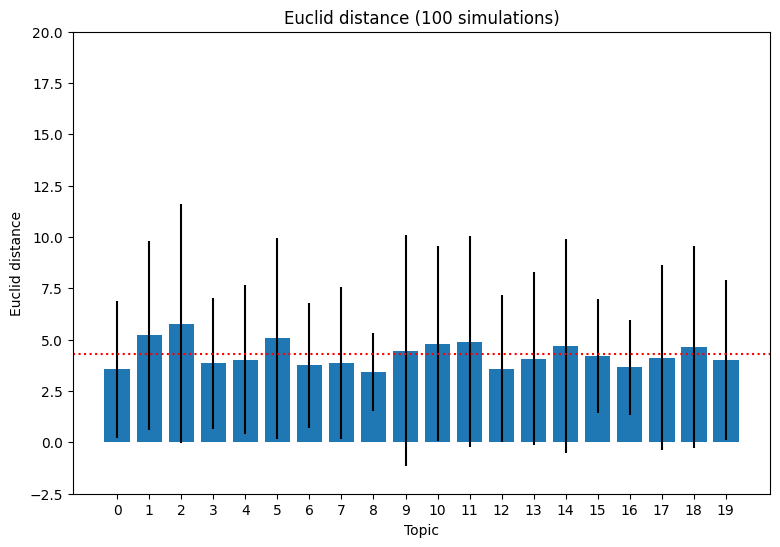

In [13]:
fig, ax = plt.subplots(figsize=(9, 6))
x = np.arange(num_topics)
euclid_mean = df_euclid.mean()
euclid_var = df_euclid.var()
ax.bar(x, euclid_mean, yerr=euclid_var)
ax.axhline(euclid_mean.mean(), color='r', linestyle='dotted')
ax.set_ylim(-2.5, 20)
ax.set_xlabel("Topic")
ax.set_xticks(range(num_topics))
ax.set_ylabel("Euclid distance")
ax.set_title("Euclid distance ({} simulations)".format(num_simulations))
plt.savefig("../../lda_distance.png")
plt.show()